In [1]:
#library(RSQLCipher)
suppressMessages(library(lubridate))
suppressWarnings(suppressMessages(library(tidyverse)))

In [91]:
as.numeric(ymd_hm("2018-03-11 2:00"))
as.numeric(ymd_hm("2018-11-04 2:00"))

[1] 1520733600

[1] 1541296800

In [3]:
tolls_raw = read_csv("../../data/toll_prices/concatenated_405_prices_2018.csv", col_types=cols(.default="d", Time="T"))

In [5]:
tolls = tolls_raw %>%
    mutate(time = as_datetime(floor(as.numeric(Time)/300-0.2)*300)) %>%
    filter(hour(time) < 19) %>%
    select(-Time) %>%
    group_by(time) %>%
    summarize_all(mean, na.rm=T) %>%
    mutate_if(is.numeric, ~ ifelse(is.nan(.), NA, .))

In [6]:
tail(tolls, 20)

time,2689,2690,2691,2692,2693,2694,2695,2696,2697,⋯,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-12-31 17:20:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2018-12-31 17:25:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2018-12-31 17:30:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2018-12-31 17:35:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2018-12-31 17:40:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2018-12-31 17:45:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2018-12-31 17:50:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2018-12-31 17:55:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2018-12-31 18:00:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [7]:
chg_idx = which.max(!is.na(tolls$`2764`))
chg_idx
tolls[(chg_idx-1):(chg_idx+1),]

[1] 24969

time,2689,2690,2691,2692,2693,2694,2695,2696,2697,⋯,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-07-27 13:45:00,7,0.75,0.75,0.75,0.75,7,0.75,7,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-07-27 13:50:00,7,0.75,0.75,0.75,0.75,7,0.75,7,NA,⋯,0.5,0.5,0.5,6.250,6.250,6.25,6.25,6.25,6.25,6.0
2018-07-27 13:55:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.5,0.5,0.5,5.625,5.625,5.50,5.50,5.50,5.50,5.5


In [8]:
which.max(is.na(as.numeric(tolls[chg_idx-1,])))
ncol(tolls)

[1] 41

[1] 79

In [9]:
tolls_a = tolls[1:(chg_idx-1),1:40]
tolls_b = tolls[chg_idx:nrow(tolls),c(1,41:79)]

In [10]:
names(tolls_a)[2:40] = as.character(as.numeric(names(tolls_a)[2:40]) + 45)

In [11]:
tolls = bind_rows(tolls_a, tolls_b) %>%
    fill(-time) %>%
    mutate_if(is.numeric, ~ ifelse(. == 0.5, 0.75, .))

In [12]:
head(tolls)

time,2734,2735,2736,2737,2738,2739,2740,2741,2742,⋯,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-01 05:00:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
2018-01-01 05:05:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
2018-01-01 05:10:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
2018-01-01 05:15:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
2018-01-01 05:20:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
2018-01-01 05:25:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75


In [13]:
nrow(tolls)

[1] 43596

Warning message:
“Removed 152 rows containing missing values (geom_path).”

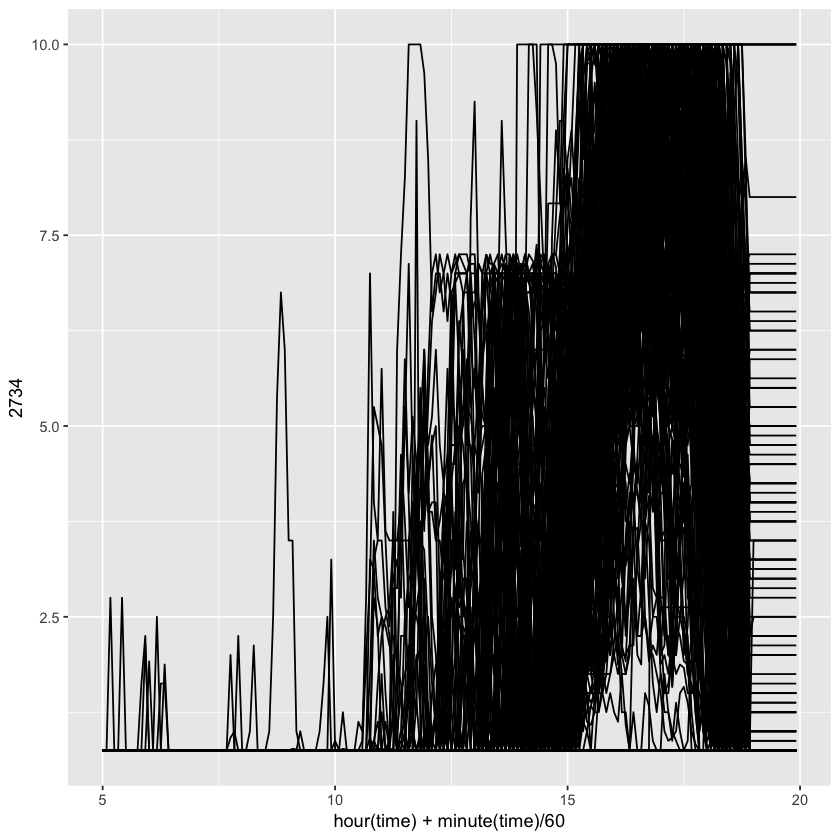

In [87]:
qplot(hour(time)+minute(time)/60, `2734`, group=yday(time), geom="line", data=tolls)

In [88]:
write_csv(tolls, "../../../data/toll_prices_def_id.csv")

In [48]:
names(tolls)[which(is.na(match(names(tolls), unique(def_id_lookup)$def_id)))]

[1] "time" "2761" "2762" "2763" "2764" "2765" "2766" "2767" "2768" "2769"
[11] "2770" "2771" "2772" "2773"

In [47]:
def_id_lookup[which(is.na(match(unique(def_id_lookup)$def_id, names(tolls)))),]

entry,exit,def_id
<dbl>,<dbl>,<dbl>
4,4,2774
4,5,2774
4,6,2731
4,7,2731
4,9,2732
4,10,2732
4,11,2732
4,12,2732
8,8,2733


In [17]:
def_id_lookup = read_csv("../../data/milepost_lookups/def_id_entry_exit.csv")

Parsed with column specification:
cols(
  entry = col_double(),
  exit = col_double(),
  def_id = col_double()
)


In [33]:
length(names(tolls)[2:40])
length(unique(def_id_lookup$def_id))

[1] 39

[1] 31

In [49]:
tolls_long = expand.grid(time=tolls$time, entry=3:23, exit=3:23) %>%
    filter(!(entry %in% c(4, 8, 9, 19))) %>%
    inner_join(def_id_lookup, by=c("entry", "exit")) %>%
    arrange(time, entry, exit) %>%
    mutate(def_id=as.character(def_id)) %>%
    left_join(gather(tolls, def_id, toll, -time), by=c("time", "def_id"))

In [50]:
tail(tolls_long)

,time,entry,exit,def_id,toll
,<dttm>,<dbl>,<dbl>,<chr>,<dbl>
3444079,2018-12-31 18:55:00,20,23,2745,0.75
3444080,2018-12-31 18:55:00,21,21,2744,0.75
3444081,2018-12-31 18:55:00,21,22,2744,0.75
3444082,2018-12-31 18:55:00,21,23,2744,0.75
3444083,2018-12-31 18:55:00,22,22,2744,0.75
3444084,2018-12-31 18:55:00,23,23,2744,0.75


In [51]:
mean(is.na(tolls_long$toll))

[1] 0.003876502

In [52]:
filter(tolls, time==ymd_hms("2018-12-31 18:35:00"))

time,2734,2735,2736,2737,2738,2739,2740,2741,2742,⋯,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-12-31 18:35:00,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,⋯,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75


In [54]:
head(filter(tail(tolls_long, 50000), is.na(toll)), 40)

time,entry,exit,def_id,toll
<dttm>,<dbl>,<dbl>,<chr>,<dbl>


In [55]:
nrow(tolls_long)

[1] 3444084

In [58]:
write_csv(mutate(tolls_long, time=as.numeric(time)), "../../../data/tolls_long.csv", col_names=F, na="")